In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [55]:
data = pd.read_csv('diabetes.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
x=data.iloc[:,0:8]
x=x.values
y=data["Outcome"].values

In [57]:
x_tarin,x_test, y_train, y_test =train_test_split(x,y,test_size=0.25, random_state=1)

In [58]:
RF_model=RandomForestClassifier(n_estimators=200)
RF_model.fit(x_tarin, y_train)

RandomForestClassifier(n_estimators=200)

In [59]:
y_prediction=RF_model.predict(x_test)
accuracy=accuracy_score(y_test,y_prediction)
roc=roc_auc_score(y_test,y_prediction)
print(accuracy)
print(roc)

0.7864583333333334
0.7537999293036408


roc_auc_score is an evaluation metric for binary classifier. higher the value, the better the performace of thee model.

so, the **accuracy 0.786** and **roc 0.753** will be our benchmark value to evaluate the feed forward neral netork.

From the follwing cell we will develop and evaluate feed_farword neural networks. we will creat MLP and deep neural nwtwork model and play with there parameters and compare the accuracy with randomForestClassifier. 
For this task we are going to use **keras** library 

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [61]:
model_1=Sequential()
model_1.add(Dense(12,input_shape=(8,),activation='sigmoid')) #hidden layer 1 with 12 neuron, 
              #   and input layer with 8 neuron as 8 feature column we have in dataset
model_1.add(Dense(1,activation='sigmoid')) # output layer  only 1 neuron (one output, binary 0 or 1) 

In model_1, I use **sigmoid** acivation function,{ domain(-inf to +inf), range(0 to 1). sigmoid activation function is prone to vanishing gradient problem, becsue there is no significent change in output of sigmoid funtion for higher value of input. So, no much change make gradient equal to zero and even vanish at some time.

To overcome this vanishing problem in next model_2 we will use **Rectifier Linear Unit (ReLU)**

it does not mean that this sigmoid activation function will not perform well all time. we compare its results with other activaion function to observe the difference in performance 
)
there are other activation function also avaible to explore like  **Tanh** and **"Leaky" Rectified Linear Unit (LReLU )**

In [62]:
model_1.compile(SGD(lr=0.003),"binary_crossentropy",metrics=["accuracy"])

as in above cell, to compile the model we have to use Keras model API method name as compile. 

Model.compile(
    optimizer="SGD",
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    **kwargs
)
in this method we must need to define the optimization method. here we can give string name of optmizer from keras optimizer layer. or we can give a optimizer instant like I have done in above cell. 

Here I used **stochastic gradient descent SGD** optimizer. you can define it in separate line or inside the model compile mehtod. 

keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
)

we can set learning rate in optimization mehtod. stochastic gradient descent mean weights will update base on single observation. you set it to full batch gradient or mini batch gradient by seting the batch_size in **model.fit** method. if it is not specified than default size will be 32, that means, it will run mini{batch gradient descent.you can make it 1 for pure stochastic descent or equal to total number of observation for full batch gradient descent.

the basic formula to find the optimal weight is same for all optimizer as given below. all other techniques alter this method to find more efficent results

                      ** w = w-alpha*gradient**
                      
 if you set the momentum value >0 it will beocme **Momentum Optimizer**. and if you set the nesterov= True it will become the **Nesterov Momentum
 
 to set it pure stochastic or full batch or mini batch gradient, change batch_size in fit function
 
 Model.fit(
    x=None,
    y=None,
    **batch_size=None**,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)


there are many more optimization techniques are available for example, **Ada Grade**, **RMSprop**, **Adam** etc

In [63]:
normalizer= StandardScaler()
x_train_normalize=normalizer.fit_transform(x_tarin)
x_test_normalize=normalizer.transform(x_test)

Gradient descent update weight base on the scale of the input. so all the input feature should be on one scale to avoid the biasness. one scale mean normalize the all input features. 

In [64]:
develop_model_1_history=model_1.fit(x_train_normalize,y_train,validation_data=(x_test_normalize,y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 0s 10ms/step - loss: 0.8918 - accuracy: 0.3455 - val_loss: 0.8847 - val_accuracy: 0.3646
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.8677 - accuracy: 0.3455 - val_loss: 0.8624 - val_accuracy: 0.3646
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.8459 - accuracy: 0.3455 - val_loss: 0.8421 - val_accuracy: 0.3698
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.8260 - accuracy: 0.3403 - val_loss: 0.8237 - val_accuracy: 0.3542
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.8080 - accuracy: 0.3420 - val_loss: 0.8070 - val_accuracy: 0.3542
Epoch 6/200
18/18 [==============================] - ETA: 0s - loss: 0.7932 - accuracy: 0.37 - 0s 2ms/step - loss: 0.7917 - accuracy: 0.3472 - val_loss: 0.7920 - val_accuracy: 0.3490
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.7771 - accuracy: 0.3507 - val_loss: 

epoch mean a single run over all data set. for example in mini_batch gradient , let's suppose total observatio are 320 and mini_batch size is 32 so 10 steps will be taken to run over all data observation therefore 1 epoch will be equal to 10 step 

In [65]:
y_predcit_from_model_1=model_1.predict_classes(x_test_normalize)
model_1_accuracy=accuracy_score(y_test,y_predcit_from_model_1)
model_1_roc=roc_auc_score(y_test,y_predcit_from_model_1)
print(model_1_accuracy)
print(model_1_roc)

0.734375
0.6527041357370096


RandomForest model accuracy was 0.786 and neural netwrok of one hiddent layer with 12 neuron has acuraccy 0.73. so far, we cam observe that randomForest perform better than NN in this particular case  

In [66]:
develop_model_1_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

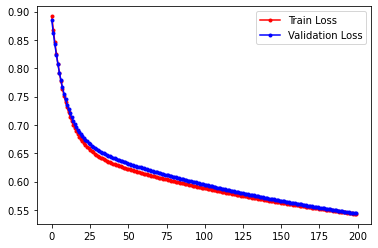

In [67]:
plt.plot(develop_model_1_history.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(develop_model_1_history.history["val_loss"],'b', marker='.', label="Validation Loss")
plt.legend()

If validation loss is more than traing loss than its mean your model is overfitting. in above plot both losses are almost same at 200 epoch.

**--** in below cells i will make a function that can train to neral network with differnet activation function and optimizer tachniques. function we help to reuse the network. 

In [68]:
def model_1_x(activation_function,optimizer_technique): # in this function activation function and optimization technique will
                                                        #be pass as function argument
    model=Sequential()
    model.add(Dense(12,input_shape=(8,),activation=activation_function)) #hidden layer 1 with 12 neuron, 
              #   and input layer with 8 neuron as 8 feature column we have in dataset
    model.add(Dense(1,activation='sigmoid')) # output layer  only 1 neuron (one output, binary 0 or 1) 
    model.compile(optimizer=optimizer_technique,loss="binary_crossentropy",metrics=["accuracy"]);
    develop_model_history=model.fit(x_train_normalize,y_train,validation_data=(x_test_normalize,y_test), epochs=200);
    
    y_predcit_from_model=model.predict_classes(x_test_normalize)
    
    model_accuracy=accuracy_score(y_test,y_predcit_from_model)
    model_roc=roc_auc_score(y_test,y_predcit_from_model)
    print("accuracy is = ",model_1_accuracy)
    print("ROC is = ",model_1_roc)
    
    plt.plot(develop_model_history.history["loss"],'r', marker='.', label="Train Loss")
    plt.plot(develop_model_history.history["val_loss"],'b', marker='.', label="Validation Loss")
    plt.legend()
    
    
    
    

Epoch 1/200
18/18 [==============================] - 0s 9ms/step - loss: 0.7134 - accuracy: 0.5174 - val_loss: 0.7084 - val_accuracy: 0.5260
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.5712 - val_loss: 0.7016 - val_accuracy: 0.5729
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.5833 - val_loss: 0.6963 - val_accuracy: 0.5833
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5885 - val_loss: 0.6920 - val_accuracy: 0.5833
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5955 - val_loss: 0.6882 - val_accuracy: 0.5781
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6007 - val_loss: 0.6849 - val_accuracy: 0.5781
Epoch 7/200
18/18 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6111 - val_loss: 0.6819 - val_accuracy: 0.5781
Epoch 8/200
1

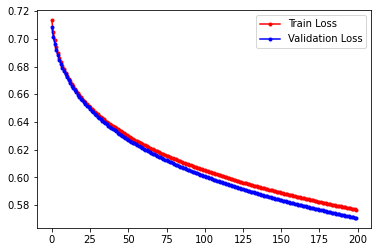

In [69]:
activation_func="sigmoid"
optimizer_tec=Adagrad(learning_rate=0.003)
model_1_x(activation_func,optimizer_tec);


Epoch 1/200
18/18 [==============================] - 0s 11ms/step - loss: 0.6162 - accuracy: 0.6580 - val_loss: 0.6031 - val_accuracy: 0.6406
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.6701 - val_loss: 0.5688 - val_accuracy: 0.6823
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.6927 - val_loss: 0.5440 - val_accuracy: 0.7135
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7448 - val_loss: 0.5242 - val_accuracy: 0.7656
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7622 - val_loss: 0.5083 - val_accuracy: 0.7917
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7778 - val_loss: 0.4960 - val_accuracy: 0.7708
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4996 - accuracy: 0.7778 - val_loss: 0.4868 - val_accuracy: 0.7812
Epoch 8/200


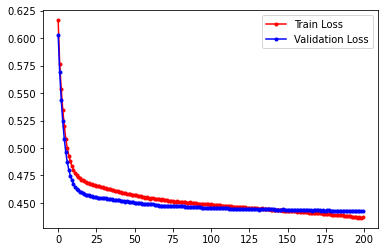

In [70]:
activation_func="sigmoid"
optimizer_tec=RMSprop(learning_rate=0.003)
model_1_x(activation_func,optimizer_tec);

Epoch 1/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6445 - accuracy: 0.6545 - val_loss: 0.6346 - val_accuracy: 0.6406
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.6545 - val_loss: 0.6063 - val_accuracy: 0.6406
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6493 - val_loss: 0.5841 - val_accuracy: 0.6562
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.6667 - val_loss: 0.5652 - val_accuracy: 0.6771
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.6875 - val_loss: 0.5487 - val_accuracy: 0.6927
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7083 - val_loss: 0.5344 - val_accuracy: 0.7292
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7309 - val_loss: 0.5221 - val_accuracy: 0.7604
Epoch 8/200
1

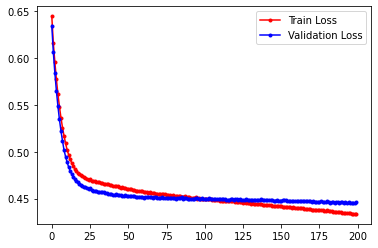

In [71]:
activation_func="sigmoid"
optimizer_tec=Adam(learning_rate=0.003)
model_1_x(activation_func,optimizer_tec);

all the optimization technique give same accuracy 0.734, but the traning and validation loss sharply reudce more in RMSprop and Adam as compare to SDG and Adagrade at same epoch. 

the other we observe in RMSprop and Adam is they make the model overfitt. you can in RMSprop technique validation loss is more than traning loss after 175th epoch.and in Adam this overfitt start at 125th epoch. if trainig loss continue reduce but validatio loss is not than its mean model is no more gernalize. it cannot perform well on gernal input outside the trainig data.

the over fitting problem can be solve by using regularization techniques for example **Dropout** , **Early stopping** or ** Regularization penalty in cost function** . there many more that you can explore, learn and play



Now in cell below, the activation function change will from sigmoid to ReLU and we use the Adam otmization technique

Epoch 1/200
18/18 [==============================] - 0s 11ms/step - loss: 0.6133 - accuracy: 0.6806 - val_loss: 0.5720 - val_accuracy: 0.7500
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7222 - val_loss: 0.5352 - val_accuracy: 0.7760
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.7413 - val_loss: 0.5075 - val_accuracy: 0.7865
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7622 - val_loss: 0.4917 - val_accuracy: 0.7812
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7604 - val_loss: 0.4779 - val_accuracy: 0.7865
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7622 - val_loss: 0.4693 - val_accuracy: 0.7812
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7604 - val_loss: 0.4653 - val_accuracy: 0.7865
Epoch 8/200


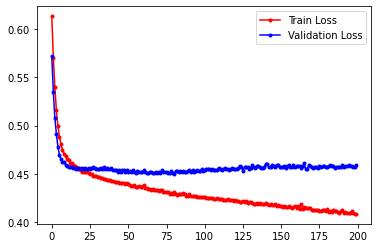

In [72]:
activation_func="relu"
optimizer_tec=Adam(learning_rate=0.003)
model_1_x(activation_func,optimizer_tec);

So,by changing the acctivation function to ReLU, model get overfitt after almost 20th epoch and it also redcue to loss 0.45 at almost 10th epoch, after this validation loss get saturate 



So far we use same network and observe changes due to chaning its parameters like Optimization techniques and Activation function.
Now, we change the network.
first we built network with one hidden layer of 12 neurons, 8 input and single out layer
Now, in following cell we will build a **Deep Neural Network** with 2 hidden layers of 6 neurons, 8 input and single out layer.
Note: a network with 2 or more hidden layer is called deep neural network

In [77]:
def model_2_x(activation_function,optimizer_technique): # in this function activation function and optimization technique will
                                                        #be pass as function argument
    model=Sequential()
    model.add(Dense(6,input_shape=(8,),activation=activation_function)) #hidden layer 1 with 12 neuron, 
              #   and input layer with 8 neuron as 8 feature column we have in dataset
    model.add(Dense(6, activation=activation_function))     
    model.add(Dense(1, activation='sigmoid')) # output layer  only 1 neuron (one output, binary 0 or 1) 

    model.compile(optimizer=optimizer_technique,loss="binary_crossentropy",metrics=["accuracy"]);
    develop_model_history=model.fit(x_train_normalize,y_train,validation_data=(x_test_normalize,y_test), epochs=200);
    
    y_predcit_from_model=model.predict_classes(x_test_normalize)
    
    model_accuracy=accuracy_score(y_test,y_predcit_from_model)
    model_roc=roc_auc_score(y_test,y_predcit_from_model)
    print("accuracy is = ",model_1_accuracy)
    print("ROC is = ",model_1_roc)
    
    plt.plot(develop_model_history.history["loss"],'r', marker='.', label="Train Loss")
    plt.plot(develop_model_history.history["val_loss"],'b', marker='.', label="Validation Loss")
    plt.legend()
    
    

Epoch 1/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6971 - accuracy: 0.5104 - val_loss: 0.6643 - val_accuracy: 0.5885
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6267 - val_loss: 0.6394 - val_accuracy: 0.6302
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.6580 - val_loss: 0.6158 - val_accuracy: 0.6458
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6684 - val_loss: 0.5872 - val_accuracy: 0.6719
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6858 - val_loss: 0.5525 - val_accuracy: 0.6875
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.7066 - val_loss: 0.5167 - val_accuracy: 0.7500
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.7257 - val_loss: 0.4858 - val_accuracy: 0.7760
Epoch 8/200
1

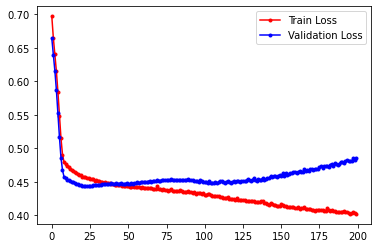

In [78]:
activation_func="relu"
optimizer_tec=Adam(learning_rate=0.003)
model_2_x(activation_func,optimizer_tec);